# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

This notebook will show you how to webscrapping the movement of the exchange rate from USD to IDR from exchange-rates.org.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [51]:
# this codeis used for requesting the web from the site

import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [52]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [53]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

### Getting right key to extract right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="assets/graphic.png">

The information that we need are the month and the inflation rate each month, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this. 

<img src="asset/key1.png">
<img src="asset/key1.png">

From inspect element we know that we need to find the line table with class `table-responsive`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [54]:
# this codeis used for finding the right key to scrap the data

table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/6/2022
    </td>
    <td>
     Wednesday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-6-2022">
      14,996.82520
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-6-2022">
      USD IDR rate for 7/6/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/5/2022
    </td>
    <td


Finding row length.

In [55]:
# this code displays the length of the row

row = table.find_all('tr')
row_length = len(row)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [56]:
temp = [] #initiating a tuple

for i in range(1, row_length+1):

    #get date 
    date = table.find_all('td')[4*i-4].text
    
    #get rate
    rate = table.find_all('td')[4*i-2].text
    
    temp.append((date,rate)) 
temp

[('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5/30/2022', '14,538.55000 IDR'),
 ('

In [57]:
# to reverse the information

temp_1 = temp[::-1]
temp_1

[('1/7/2022', '14,318.75000 IDR'),
 ('1/10/2022', '14,290.15000 IDR'),
 ('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR'),
 ('1/17/2022', '14,331.25000 IDR'),
 ('1/18/2022', '14,358.70000 IDR'),
 ('1/19/2022', '14,362.85000 IDR'),
 ('1/20/2022', '14,327.60000 IDR'),
 ('1/21/2022', '14,329.75000 IDR'),
 ('1/24/2022', '14,350.70000 IDR'),
 ('1/25/2022', '14,330.55000 IDR'),
 ('1/26/2022', '14,366.45000 IDR'),
 ('1/27/2022', '14,395.00000 IDR'),
 ('1/28/2022', '14,383.40000 IDR'),
 ('1/31/2022', '14,339.40000 IDR'),
 ('2/1/2022', '14,328.30000 IDR'),
 ('2/2/2022', '14,355.35000 IDR'),
 ('2/3/2022', '14,387.00000 IDR'),
 ('2/4/2022', '14,400.70000 IDR'),
 ('2/7/2022', '14,394.90000 IDR'),
 ('2/8/2022', '14,386.75000 IDR'),
 ('2/9/2022', '14,334.30000 IDR'),
 ('2/10/2022', '14,357.00000 IDR'),
 ('2/11/2022', '14,344.75000 IDR'),
 ('2/14/2022', '14,303.45000 IDR'),
 ('2/15/2022', '14,265.45000 IDR'),


## Creating data frame & Data wrangling

Put the array into dataframe

In [58]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','rate'))
df.head()

,date,rate
0,7/6/2022,"14,996.82520 IDR"
1,7/5/2022,"15,014.65000 IDR"
2,7/4/2022,"14,994.55000 IDR"
3,7/1/2022,"14,975.15000 IDR"
4,6/30/2022,"14,928.80000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [59]:
df['rate']=df['rate'].str.replace(' IDR', '') # delete IDR
df['rate']=df['rate'].str.replace(',', '')    # delete coma
df.head()

,date,rate
0,7/6/2022,14996.82520
1,7/5/2022,15014.65000
2,7/4/2022,14994.55000
3,7/1/2022,14975.15000
4,6/30/2022,14928.80000


In [60]:
df.dtypes

date    object
rate    object
dtype: object

In [61]:
# change the types of data

df['date'] = df['date'].astype('datetime64') # change to datetime format
df['rate'] = df['rate'].astype('float') # change to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    129 non-null    datetime64[ns]
 1   rate    129 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='date'>

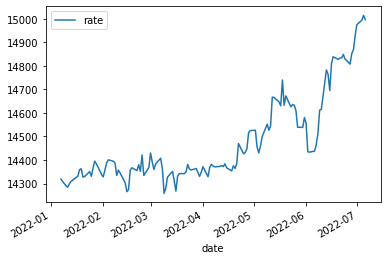

In [62]:
df = df.set_index('date')
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

## Conclusion

1. USD exchange rate against IDR has increased during 2022
2. The highest exchange rate during 2022 occurred on July 5, 2022, which amounted to 15,014.65


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.